In [11]:
import sys

cfg = open('/Users/artyom/Software/pythia/pythia8307/Makefile.inc')
lib = '../lib'

for line in cfg:

    if line.startswith('PREFIX_LIB='): lib = line[11:-1]; break
    
sys.path.insert(0, lib)

import pythia8

In [12]:
pythia = pythia8.Pythia('printBanner = false')

N_events = int(1e5)

output = open('data/experimental/211.csv', 'w')
output.write('pT,xF,E\n')

pythia.readFile('config/config.cmnd')

pythia.init()

for event in range(N_events):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    for j in range(entries):

        id = pythia.event[j].id()
        
        if int(id) == 211:

            pT = pythia.event[j].pT()
            xF = 2 * pythia.event[j].pz() / 17.27
            E = pythia.event[j].e()

            output.write('{},{},{}\n'.format(pT, xF, E))

sig_total = pythia.getSigmaTotal()

pythia.stat()

output.close()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 09 Oct 2022 at 22:38:16    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('data/generated/211.csv')
ref = pd.read_csv('data/experimental/xsect_piplus.txt', sep=' ')

In [15]:
xF_bin_centr = np.array([0, 0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.1, 0.12, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])
xF_bin_size = np.hstack(((np.diff(xF_bin_centr) / 2)[0], np.diff(xF_bin_centr) / 2))
xF_bin = list(zip(xF_bin_centr - xF_bin_size, xF_bin_centr + xF_bin_size))

In [16]:
pT_bin_centr = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1])
pT_bin_size = np.hstack(((np.diff(pT_bin_centr) / 2)[0], np.diff(pT_bin_centr) / 2))
pT_bin = list(zip(pT_bin_centr - pT_bin_size, pT_bin_centr + pT_bin_size))

In [17]:
xsect = []

for xF in xF_bin:

    dxF = xF[1] - xF[0]

    for pT in pT_bin:

        mask_for_bin = (data['xF'] > xF[0]) * (data['xF'] < xF[1]) * (data['pT'] > pT[0]) * (data['pT'] < pT[1])

        #sigma_trig = 28.23

        dn = data[mask_for_bin]['E'].size

        dpT = pT[1] - pT[0]

        dp3 = dxF * (dpT ** 2)

        E = data[mask_for_bin]['E']

        xsect.append(E.mean() * (sig_total / N_events) * (dn / dp3))

xsect = np.where(np.isnan(xsect), 0, xsect)

In [18]:
xsect = xsect.reshape((xF_bin_centr.size, pT_bin_centr.size))

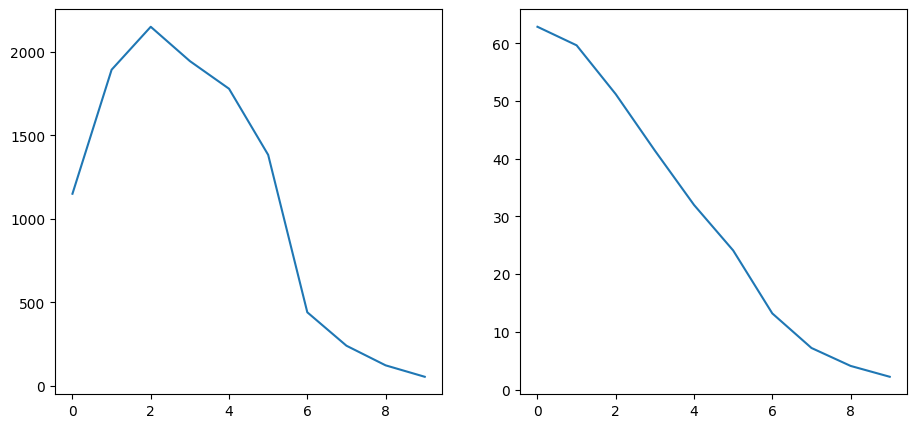

In [19]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.plot(xsect[0][:10])

plt.subplot(1, 2, 2)
plt.plot(ref['xsect'][:10])

plt.show()